In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [21]:
## uni = file name
uni = "pid_pi0_e1_allMeV_nopadding_1_32_8_64_100"

path = "/users/yewzzang/work/KNO_reconstruction/combined/result_pid/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [22]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

pid_pi0_e1_allMeV_nopadding_1_32_8_64_100


In [23]:
train_list = [
'/users/yewzzang/work/KNO_reconstruction/combined/result_pid/pid_mu0_e1_50MeV_nopadding_1_32_8_64_100/train.csv',
'/users/yewzzang/work/KNO_reconstruction/combined/result_pid/pid_mu0_e1_100MeV_nopadding_1_32_8_64_100/train.csv',
'/users/yewzzang/work/KNO_reconstruction/combined/result_pid/pid_mu0_e1_50_300MeV_nopadding_1_32_8_64_100/train.csv',
'/users/yewzzang/work/KNO_reconstruction/combined/result_pid/pid_mu0_e1_50_800MeV_nopadding_1_32_8_64_100/train.csv',
'/users/yewzzang/work/KNO_reconstruction/combined/result_pid/pid_pi0_e1_allMeV_nopadding_1_32_8_64_100/train.csv',]
# '/users/yewzzang/work/KNO_reconstruction/combined/result_pid/vtx_mu_500MeV_padding_1_64_8_64_200/train.csv'
# ]

0 348  /  MTL = 0.45005  /  MTL epoch = 346  /  0.45046  /  MVL epoch = 333  /  MVL_ACC = 79.723%  /  MAX_ACC = 79.855%  /  pid_mu0_e1_50MeV_nopadding_1_32_8_64_100
1 24  /  MTL = 0.03091  /  MTL epoch = 023  /  0.02940  /  MVL epoch = 017  /  MVL_ACC = 99.149%  /  MAX_ACC = 99.149%  /  pid_mu0_e1_100MeV_nopadding_1_32_8_64_100
2 60  /  MTL = 0.11994  /  MTL epoch = 059  /  0.11015  /  MVL epoch = 055  /  MVL_ACC = 95.328%  /  MAX_ACC = 95.328%  /  pid_mu0_e1_50_300MeV_nopadding_1_32_8_64_100
3 20  /  MTL = 0.05354  /  MTL epoch = 019  /  0.04902  /  MVL epoch = 018  /  MVL_ACC = 97.833%  /  MAX_ACC = 97.837%  /  pid_mu0_e1_50_800MeV_nopadding_1_32_8_64_100
4 15  /  MTL = 0.62733  /  MTL epoch = 014  /  0.62749  /  MVL epoch = 014  /  MVL_ACC = 60.305%  /  MAX_ACC = 60.357%  /  pid_pi0_e1_allMeV_nopadding_1_32_8_64_100


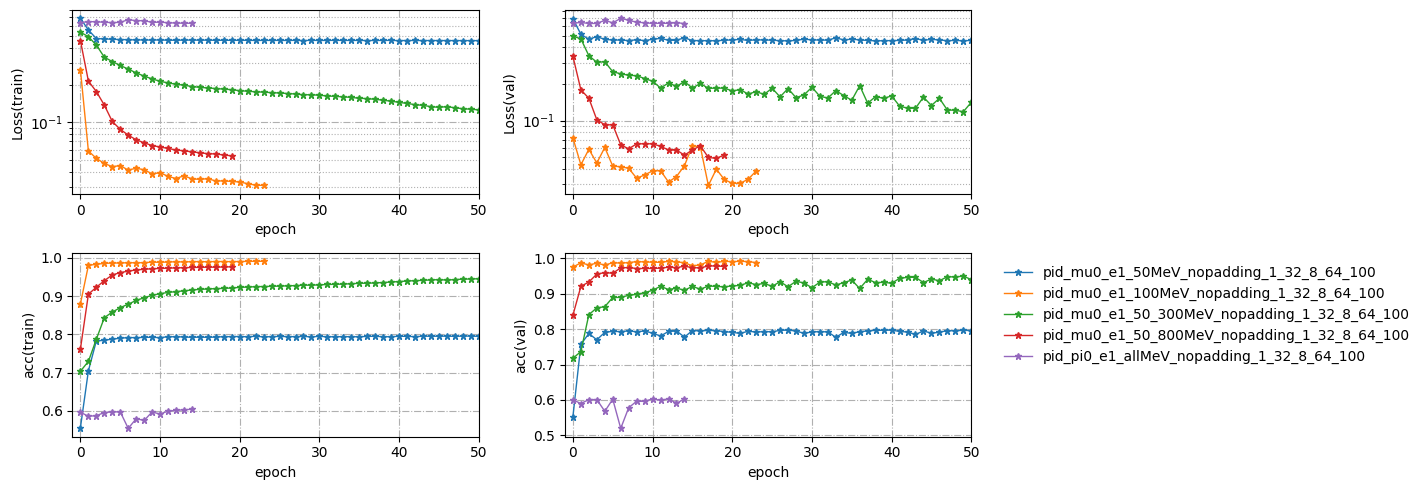

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(2, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(2, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(2, 2, 3, ylabel='acc(train)', xlabel='epoch')
ax4 = plt.subplot(2, 2, 4, ylabel='acc(val)', xlabel='epoch')

for ax in (ax1, ax2,ax3,ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([-1,50])
# ax3.set_ylim(0.9,1.0)
# ax4.set_ylim(0.9,1.0)
lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'],'*-', linewidth=1,label=label.split('/')[-2]) 
    ax2.plot(df['val_loss'],'*-', linewidth=1,label=label.split('/')[-2])
    ax3.plot(df['acc'],'*-', linewidth=1,label=label.split('/')[-2])
    ax4.plot(df['val_acc'],'*-', linewidth=1,label=label.split('/')[-2])
    

    print(i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.5f}",
        " / ",
        "MTL epoch = " + str("{:03}".format(np.where(df['loss']==df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.5f}",
        " / ",
        "MVL epoch = " + str("{:03}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
        " / ",
        "MVL_ACC = " + str("{:.3f}".format(100*df['val_acc'][np.where(df['val_loss']==df['val_loss'].min())[0][0]]))+"%",
        " / ",
        "MAX_ACC = " + str("{:.3f}".format(100*df['val_acc'][np.where(df['val_acc']==df['val_acc'].max())[0][0]]))+"%",
        " / ",
        
        label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()
plt.close()